In [1]:
import pandas as pd
import numpy as np

In [18]:
df = pd.read_csv('Resources\startup_funding.csv')
df

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN
...,...,...,...,...,...,...,...,...,...,...
3039,3040,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"45,00,000",NaN
3040,3041,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"8,25,000",Govt backed VC Fund
3041,3042,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"15,00,000",NaN
3042,3043,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"


In [19]:
#in a data science 80% time will go into the data cleaning

df.drop(columns = ['Remarks'],inplace = True)

In [20]:
df.set_index('Sr No',inplace = True)

In [21]:
df.rename(columns = {'Date dd/mm/yyyy':'Date', 
                     'Startup Name':'Startup',
                     'Industry Vertical':'Vertical',
                     'City  Location':'City',
                     'Investors Name':'Investors',
                     'InvestmentnType':'Round',
             'Amount in USD':'Amount'},inplace = True)


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3044 entries, 1 to 3044
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         3044 non-null   object
 1   Startup      3044 non-null   object
 2   Vertical     2873 non-null   object
 3   SubVertical  2108 non-null   object
 4   City         2864 non-null   object
 5   Investors    3020 non-null   object
 6   Round        3040 non-null   object
 7   Amount       2084 non-null   object
dtypes: object(8)
memory usage: 214.0+ KB


In [23]:
#if you have a missing value then you can not apply the function for whole column
df['Amount'].fillna('0',inplace = True)
# df['Amount'] = df['Amount'].apply(lambda x : x.replace(',','') if type(x) == 'str' else x ) not working

C:\Users\axitk\AppData\Local\Temp\ipykernel_15076\3355982923.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Amount'].fillna('0',inplace = True)


In [24]:
df['Amount'] = df['Amount'].str.replace(',','')
df['Amount'] = df['Amount'].str.replace('Unknown','0')
df['Amount'] = df['Amount'].str.replace('unknown','0')
df['Amount'] = df['Amount'].str.replace('undisclosed','0')
df['Amount'] = df['Amount'].str.replace('Undisclosed','0')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3044 entries, 1 to 3044
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         3044 non-null   object
 1   Startup      3044 non-null   object
 2   Vertical     2873 non-null   object
 3   SubVertical  2108 non-null   object
 4   City         2864 non-null   object
 5   Investors    3020 non-null   object
 6   Round        3040 non-null   object
 7   Amount       3044 non-null   object
dtypes: object(8)
memory usage: 214.0+ KB


In [25]:
df = df[df['Amount'].str.isdigit()]
df

,Date,Startup,Vertical,SubVertical,City,Investors,Round,Amount
Sr No,,,,,,,,
1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000
2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394
3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860
4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000
5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000
...,...,...,...,...,...,...,...,...
3040,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,4500000
3041,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,825000
3042,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,1500000


In [26]:
df['Amount'] = df['Amount'].astype('float')

C:\Users\axitk\AppData\Local\Temp\ipykernel_15076\3718911808.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Amount'] = df['Amount'].astype('float')


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3029 entries, 1 to 3044
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         3029 non-null   object 
 1   Startup      3029 non-null   object 
 2   Vertical     2858 non-null   object 
 3   SubVertical  2104 non-null   object 
 4   City         2849 non-null   object 
 5   Investors    3005 non-null   object 
 6   Round        3027 non-null   object 
 7   Amount       3029 non-null   float64
dtypes: float64(1), object(7)
memory usage: 213.0+ KB


In [28]:
df.head()

,Date,Startup,Vertical,SubVertical,City,Investors,Round,Amount
Sr No,,,,,,,,
1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000.0
2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394.0
3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860.0
4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000.0
5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000.0


In [29]:
df['Amount'] = df['Amount'].apply(lambda x : x*90/10000000)

C:\Users\axitk\AppData\Local\Temp\ipykernel_15076\280327760.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Amount'] = df['Amount'].apply(lambda x : x*90/10000000)


In [30]:
df['Date'] = df['Date'].str.replace('05/072018','05/07/2028')
df['Date'] = df['Date'].str.replace('01/07/015','01/07/2015')
df['Date'] = df['Date'].str.replace('12/05.2015','12/05/2015')
df['Date'] = df['Date'].str.replace('13/04.2015','13/04/2015')
df['Date'] = df['Date'].str.replace('15/01.2015','15/01/2015')
df['Date'] = df['Date'].str.replace('22/01//2015','22/01/2015')

C:\Users\axitk\AppData\Local\Temp\ipykernel_15076\668300550.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].str.replace('05/072018','05/07/2028')
C:\Users\axitk\AppData\Local\Temp\ipykernel_15076\668300550.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].str.replace('01/07/015','01/07/2015')
C:\Users\axitk\AppData\Local\Temp\ipykernel_15076\668300550.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

In [31]:
df['Date'] = pd.to_datetime(df['Date'],dayfirst = True)

C:\Users\axitk\AppData\Local\Temp\ipykernel_15076\2635356746.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'],dayfirst = True)


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3029 entries, 1 to 3044
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         3029 non-null   datetime64[ns]
 1   Startup      3029 non-null   object        
 2   Vertical     2858 non-null   object        
 3   SubVertical  2104 non-null   object        
 4   City         2849 non-null   object        
 5   Investors    3005 non-null   object        
 6   Round        3027 non-null   object        
 7   Amount       3029 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 213.0+ KB


In [33]:
#droping the rows with in the given range of 10%

df = df.dropna(subset=['Date','Startup','Vertical','City','Investors','Round','Amount'])
100*(-2823+3029)/3029

6.800924397490921

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2823 entries, 1 to 2873
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         2823 non-null   datetime64[ns]
 1   Startup      2823 non-null   object        
 2   Vertical     2823 non-null   object        
 3   SubVertical  2078 non-null   object        
 4   City         2823 non-null   object        
 5   Investors    2823 non-null   object        
 6   Round        2823 non-null   object        
 7   Amount       2823 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 198.5+ KB


In [35]:
investor = (sorted(set(df['Investors'].str.split(',').sum())))

In [38]:
investor.remove('')

ValueError: list.remove(x): x not in list

In [39]:
investor

[' & Others',
 ' 100 Co-founders Lab and others.',
 ' 122 West Ventures',
 ' 1Crowd',
 ' 3ONE4 Capital Advisors',
 ' 3one4 Capital',
 ' 3one4 Capital Advisors LLP',
 ' 500 Start-Ups',
 ' 500 Startups',
 ' 500 Startups & Other HNIs',
 ' 50K Ventures & others',
 ' 91SpringBoard',
 ' 91springboard',
 ' ABB Technology Ventures',
 ' ABCOM Investments',
 ' AECAL',
 ' AET Fund',
 ' AL Nour International Holdings and Mark V Investments',
 ' ASP Consulting',
 ' AVN Business Solutions',
 ' Aarin Capital',
 ' Aarin Capital & Others',
 ' Aaruha Technology Fund',
 ' Abaran Deep',
 ' Abhai S. Rao',
 ' Abhay Singhal',
 ' Abhijit Bhandari',
 ' Abhinav Patodia',
 ' Abhinav Sinha',
 ' Abhishek Acharya',
 ' Abhishek Goyal',
 ' Abhishek Gupta',
 ' Abhishek Jain',
 ' Abhishekh Goyal',
 ' Abstract Ventures',
 ' Abu Farhan Azmi',
 ' Accel',
 ' Accel India',
 ' Accel Partner',
 ' Accel Partners',
 ' Accel Partners & Others',
 ' Accel Partners & Raghunandan Gangappa',
 ' Accel Partners & existing investors',
 

In [219]:
df.to_csv('startup_cleaned.csv',index = False)

In [75]:
df[df['Investors'].str.contains('Paragon Partners')].head(5)[['Date','Startup','Vertical','City','Round','Amount']]

,Date,Startup,Vertical,City,Round,Amount
142,2018-11-25,InCred Finance,Finance,India,Private Equity,378.0
235,2018-06-12,eshakti,E-Commerce,Chennai,Private Equity,90.9
2299,2015-10-05,IndiaLends,Online Consumer Lending platform,New Delhi,Private Equity,9.0


In [40]:
df['Investors'] = df['Investors'].str.strip(" ")

C:\Users\axitk\AppData\Local\Temp\ipykernel_15076\3331480153.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Investors'] = df['Investors'].str.strip(" ")


In [41]:
#how much money investor had invested 

df[df['Investors'].str.contains('IDG Ventures')].groupby('Startup')['Amount'].sum().sort_values(ascending = False)


Startup
Cure Fit                 1080.000000
Lenskart                  540.000000
Bizongo                   225.000000
CureFit                   225.000000
Curefit                   135.000000
Fintellix                 135.000000
Xpressbees                112.500000
FirstCry.com               90.000000
Uniphore                   79.200000
POPxo                      77.400000
HealthifyMe                54.000000
\\xc2\\xa0CloudCherry      54.000000
Sigtuple                   52.200000
Flyrobe                    47.700000
Aasaanjobs                 45.000000
RentMojo                   45.000000
Vayana                     36.000000
Agrostar                   36.000000
PlaySimple                 36.000000
Blowhorn                   32.850000
Tripoto                    32.322375
Active.ai                  27.000000
Heckyl                     24.300000
CreditMantri               22.500000
eShakti                    20.700000
POPxo.com                  18.000000
RentoMojo                  18.

In [1]:
import matplotlib.pyplot as plt

In [47]:
df[df['Investors'].str.contains('IDG Ventures')].groupby('Vertical')['Amount'].sum()

Vertical
Banking Analytics Platform                                  135.000000
Bus Aggregation and rental mobile app                         6.750000
CRM / Analytics platform                                      9.000000
Casual Dating App                                             0.000000
Consumer Internet                                          1876.050000
Credit Management Services                                   22.500000
ECommerce                                                   112.500000
Ecommerce                                                    20.700000
Hyperlocal Handyman Services                                 18.000000
Hyperlocal healthcare product Delivery Service provider       9.000000
Mobile Commerce for Farmers                                  36.000000
Online Furniture, Home Appliances Rental Platform            18.000000
Online content platform for women                            18.000000
Social Media                                                 32.3223

In [50]:
df[df['Investors'].str.contains('IDG Ventures')].groupby('Round')['Round'].count().sort_values(ascending = False).head(5)

Round
Private Equity    39
Seed Funding       4
Debt Funding       1
Series B           1
Name: Round, dtype: int64

In [51]:
#Yoy investment

df['Year'] = df['Date'].dt.year
df.head()

C:\Users\axitk\AppData\Local\Temp\ipykernel_15076\2896488376.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Date'].dt.year


,Date,Startup,Vertical,SubVertical,City,Investors,Round,Amount,Year
Sr No,,,,,,,,,
1,2020-01-09,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1800.000000,2020
2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,72.435546,2020
3,2020-01-09,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,165.229740,2020
4,2020-01-02,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,27.000000,2020
5,2020-01-02,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,16.200000,2020


<Axes: xlabel='Year'>

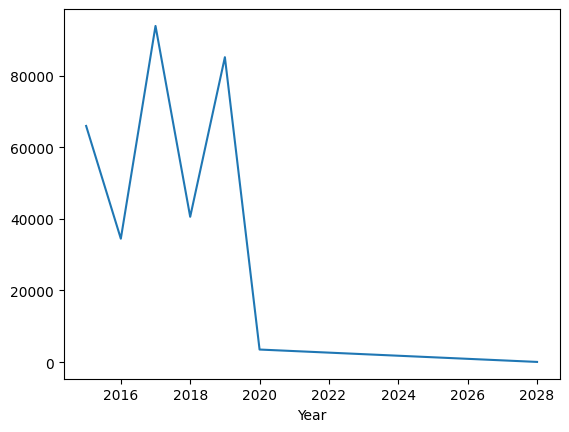

In [53]:
df.groupby('Year')['Amount'].sum().plot(kind='line')

In [58]:
#overall Analysis
df['Amount'].sum()

np.float64(323451.265815)

In [ ]:
df['Startup'].nunique()

np.int64(2823)